# ODE using forward Euler

Conside the ODE
$$
y' = -y + 2 \exp(-t) \cos(2t)
$$
with initial condition
$$
y(0) = 0
$$
The exact solution is
$$
y(t) = \exp(-t) \sin(2t)
$$

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

Right hand side function

In [8]:
def f(t,y):
    return -y + 2.0*np.exp(-t)*np.cos(2.0*t)

Exact solution

In [9]:
def yexact(t):
    return np.exp(-t)*np.sin(2.0*t)

This implements Euler method
$$
y_n = y_{n-1} + h f(t_{n-1},y_{n-1})
$$

In [10]:
def euler(t0,T,y0,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    y[0] = y0
    t[0] = t0
    for n in range(1,N):
        y[n] = y[n-1] + h*f(t[n-1],y[n-1])
        t[n] = t[n-1] + h
    return t, y

## Solve for a given h

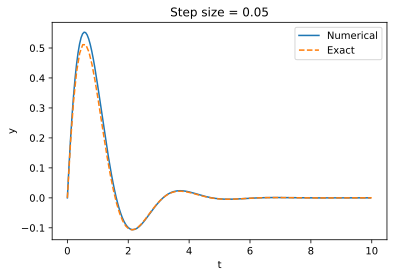

In [11]:
t0 = 0
T  = 10
h  = 1.0/20.0
t,y = euler(t0,T,0,h)
te = np.linspace(t0,T,100)
ye = yexact(te)
plt.plot(t,y,te,ye,'--')
plt.legend(('Numerical','Exact'))
plt.xlabel('t')
plt.ylabel('y')
plt.title('Step size = ' + str(h));

## Solve for several h

Study the effect of decreasing step size. The error is plotted in log scale.

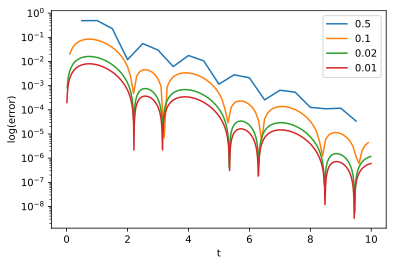

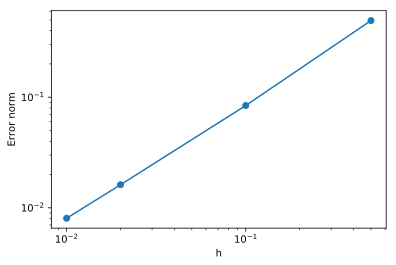

In [17]:
hh = [1.0/2.0, 1.0/10.0, 1.0/50.0, 1.0/100.0]
err= np.zeros(len(hh))
for (i,h) in enumerate(hh):
    t,y = euler(t0,T,0.0,h)
    ye = yexact(t)
    err[i] = np.abs(y-ye).max()
    plt.semilogy(t,np.abs(y-ye))
    plt.legend(hh)
    plt.xlabel('t')
    plt.ylabel('log(error)')
    
plt.figure()
plt.loglog(hh,err,'o-')
plt.xlabel('h')
plt.ylabel('Error norm');